# Assignment 1

In [120]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To analyze the results, two indexes are going to be considered:
- Speedup: $S(n, t) = \frac{T_{s}(n)}{T_{p}(n)}$
    - The speedup measures how much faster the parallel algorithm is compared to the sequential one.
    - $p$ is the number of used cores.
    - $T_{s}(n)$ is the time taken by the sequential algorithm.
    - $T_{p}(n)$ is the time taken by the parallel algorithm.
- Efficiency: $E(n, t) = \frac{S(n, t)}{p}$
    - The efficiency measures the percentage of time for which a processor is utilized effectively.

The theorical maximum speedup is $p$, while the maximum efficiency is $1$.

In [121]:
# Function to summarize the results and prepare them for plotting
def get_summary(filename, test='omp'):

    ## Load data
    path = f"results/{filename}.csv"
    data = pd.read_csv(path)

    match test:
        case 'omp':
            ## Summarize data
            data = data.groupby('OMP-threads').mean('time')
            data.reset_index(inplace=True)

            ## Compute speedup and efficiency
            data['size'] = data['size'].astype(int)
            data['speedup'] = data['time'][0] / data['time']
            data['efficiency'] = data['speedup'] / data['OMP-threads']
        case 'mpi':
            ## Summarize data
            data = data.groupby('cores').mean('time')
            data.reset_index(inplace=True)

            ## Compute speedup and efficiency
            data['size'] = data['size'].astype(int)
            data['speedup'] = data['time'][0] / data['time']
            data['efficiency'] = data['speedup'] / data['cores']
        
    ## Add discriminant for plotting
    data['test'] = 'Size: ' + data['size'].astype(str)

    return data

# OMP Scalability

### Ordered Evolution

In [122]:
# Load data
omp_ordered_10000 = get_summary('omp_ordered_10000')
omp_ordered_5000 = get_summary('omp_ordered_5000')

omp_ordered = pd.concat([omp_ordered_10000, omp_ordered_5000])

omp_ordered

,OMP-threads,size,time,speedup,efficiency,test
0,1,10000,79.070767,1.000000,1.000000,Size: 10000
1,2,10000,40.208491,1.966519,0.983260,Size: 10000
2,3,10000,27.134883,2.913990,0.971330,Size: 10000
3,4,10000,20.629881,3.832827,0.958207,Size: 10000
4,5,10000,16.769590,4.715128,0.943026,Size: 10000
...,...,...,...,...,...,...
59,60,5000,1.418957,14.359342,0.239322,Size: 5000
60,61,5000,1.413675,14.412996,0.236279,Size: 5000
61,62,5000,1.408537,14.465566,0.233316,Size: 5000
62,63,5000,1.404831,14.503728,0.230218,Size: 5000


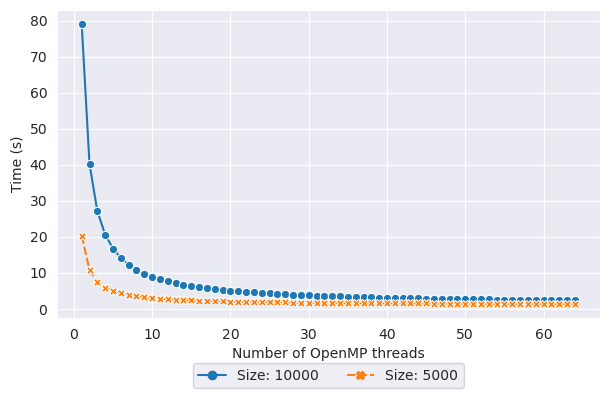

In [123]:
# Time plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='OMP-threads', 
    y='time', 
    data=omp_ordered, 
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

# Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.ylabel('Time (s)')
plt.xlabel('Number of OpenMP threads')
plt.savefig('assets/omp_ordered_time.png', dpi=250, bbox_inches='tight')
plt.show()

As expected, the plot shows that the execution time decreases as the number of OpenMP threads increases. The execution time quickly approaches an almost constant value, meaning that after a certain number of OpenMP threads (in particular 30-40), the benefit of multi-threading is not significant.

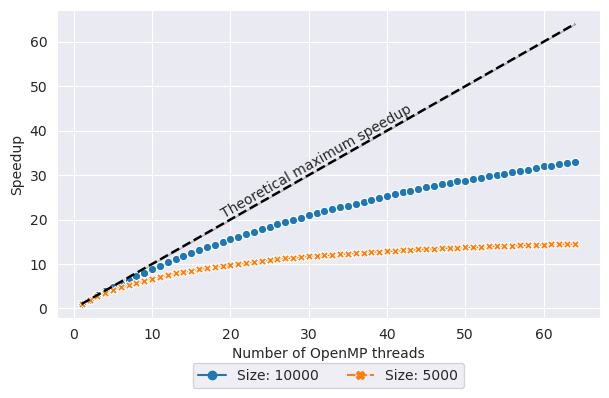

In [124]:
# Speedup plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='OMP-threads', 
    y='speedup', 
    data=omp_ordered, 
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

## Theoretical maximum speedup:
sns.lineplot(
    x='OMP-threads', 
    y='OMP-threads', 
    data=omp_ordered, 
    color='black',
    linestyle='--',
    linewidth=1.75
)
plt.text(x=31, y=33, 
         s='Theoretical maximum speedup', 
         va='center', 
         ha='center', 
         rotation=45, 
         rotation_mode='anchor', 
         transform_rotates_text=True)

## Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')
plt.ylabel('Speedup')
plt.xlabel('Number of OpenMP threads')
plt.savefig('assets/omp_ordered_speedup.png', dpi=250, bbox_inches='tight')
plt.show()

The graph shows a sublinear trend for the speedup, this is probably due to the communication and synchronization overhead introduced at higher core counts. Furthermore, Amdahl’s Law states that the speedup of a program is limited by the proportion of the code that cannot be parallelized. Furthermore, the plot is coherent with the Gustafson’s Law, because the speedup is better with an increased problem size, because the curve relative to the $10000 \times 10000$ game field is above the one relative to the $5000 \times 5000$ game field.

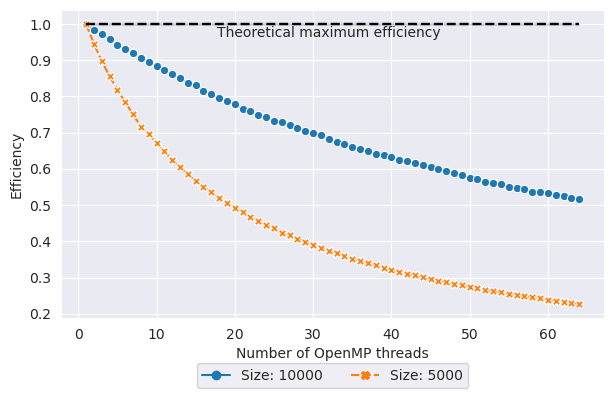

In [125]:
# Efficiency plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='OMP-threads', 
    y='efficiency', 
    data=omp_ordered, 
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

## Theoretical maximum efficiency
sns.lineplot(
    x='OMP-threads', 
    y=1, 
    data=omp_ordered,
    color='black',
    linestyle='--',
    linewidth=1.75
)
plt.text(x=32, 
         y=0.975, 
         s='Theoretical maximum efficiency', 
         va='center', 
         ha='center')

## Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.ylabel('Efficiency')
plt.xlabel('Number of OpenMP threads')
plt.savefig('assets/omp_ordered_efficiency.png', dpi=250, bbox_inches='tight')
plt.show()

The plot suggests that the efficiency decreases quite fast as the number of OpenMP threads increases. This is probably due to the fact that the workload is not evenly distributed among the cores (OMP_PLACES=cores), some of them may finish their tasks early and wait for others to complete causing a decrease in efficiency. Beyond a certain point, adding more cores might not provide substantial benefits. Also the efficiency is better with an increased problem size, again satisfying the Gustafson’s Law.

### Static Evolution

In [126]:
# Load data
omp_static_10000 = get_summary('omp_static_10000')
omp_static_5000 = get_summary('omp_static_5000')

omp_static = pd.concat([omp_static_10000, omp_static_5000])

omp_static

,OMP-threads,size,time,speedup,efficiency,test
0,1,10000,78.076420,1.000000,1.000000,Size: 10000
1,2,10000,39.769981,1.963200,0.981600,Size: 10000
2,3,10000,26.877640,2.904884,0.968295,Size: 10000
3,4,10000,20.476771,3.812926,0.953232,Size: 10000
4,5,10000,16.656881,4.687337,0.937467,Size: 10000
...,...,...,...,...,...,...
59,60,5000,1.399281,14.407263,0.240121,Size: 5000
60,61,5000,1.397843,14.422086,0.236428,Size: 5000
61,62,5000,1.389487,14.508811,0.234013,Size: 5000
62,63,5000,1.405947,14.338957,0.227602,Size: 5000


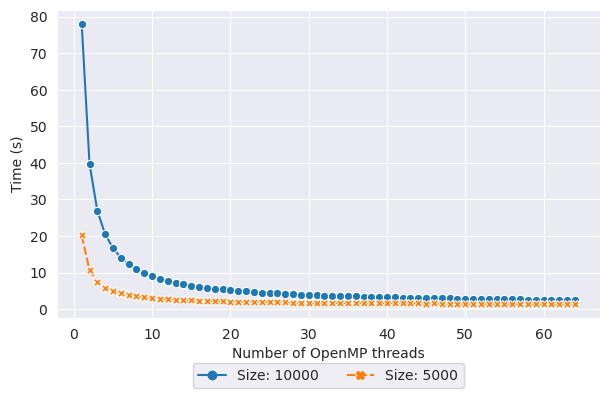

In [127]:
# Time plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='OMP-threads', 
    y='time', 
    data=omp_static, 
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

# Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.ylabel('Time (s)')
plt.xlabel('Number of OpenMP threads')
plt.savefig('assets/omp_static_time.png', dpi=250, bbox_inches='tight')
plt.show()

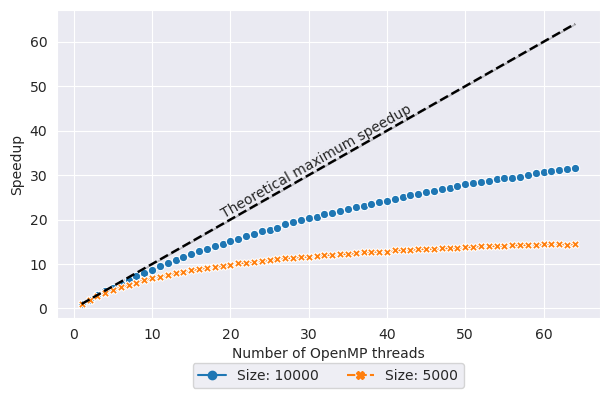

In [128]:
# Speedup plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='OMP-threads', 
    y='speedup', 
    data=omp_static,
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

## Theoretical maximum speedup:
sns.lineplot(
    x='OMP-threads', 
    y='OMP-threads', 
    data=omp_static, 
    color='black',
    linestyle='--',
    linewidth=1.75
)
plt.text(x=31, y=33, 
         s='Theoretical maximum speedup', 
         va='center', 
         ha='center', 
         rotation=45, 
         rotation_mode='anchor', 
         transform_rotates_text=True)

## Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')
plt.ylabel('Speedup')
plt.xlabel('Number of OpenMP threads')
plt.savefig('assets/omp_static_speedup.png', dpi=250, bbox_inches='tight')
plt.show()

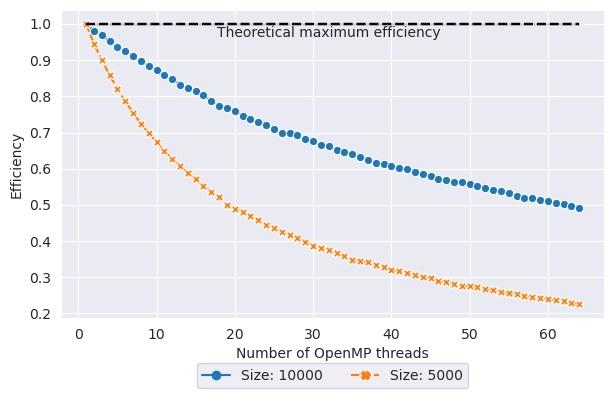

In [129]:
# Efficiency plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='OMP-threads', 
    y='efficiency', 
    data=omp_static, 
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

## Theoretical maximum efficiency
sns.lineplot(
    x='OMP-threads', 
    y=1, 
    data=omp_static,
    color='black',
    linestyle='--',
    linewidth=1.75
)
plt.text(x=32, 
         y=0.975, 
         s='Theoretical maximum efficiency', 
         va='center', 
         ha='center')

## Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.ylabel('Efficiency')
plt.xlabel('Number of OpenMP threads')
plt.savefig('assets/omp_static_efficiency.png', dpi=250, bbox_inches='tight')
plt.show()

The same considerations given in the case of the ordered evolution apply here as well.

The OpenMP scalability showed common results:
- decreased execution time for an increased number of threads, with an horizontal asymptote that is reached after a certain number of threads;
- sublinear speedup, increased with a greater problem size (Gustafson's Law);
- efficiency decreases as the number of threads increases due to thread imbalance, but it's increased with a greater problem size (Gustafson's Law).

The results in the case of the static evolution method are quite similar to the ones achieved in the case of the ordered evolution method, this is probably due to the fact that as for OpenMP, the two procedures are quite similar.

In the next tests, a greater difference between the results in the case of the ordered evolution and the static evolution is expected due to the fact that the static evolution method exploits MPI to parallelize the code and the ordered evolution method does not.

# Strong MPI Scalability

### Ordered Evolution

The 2h limit imposed by the Orfeo cluster was not enough to complete the tests for the $10000 \times 10000$ game field and also for the $5000 \times 5000$ game field.
Since the ordered evolution method doesn't exploit MPI, the execution time is expected to be constant, independently from the number of MPI processes, so it's not crucial to have all the repetitions.

In [130]:
# Load data
MPI_ordered_10000 = get_summary('strong_MPI_ordered_10000', test='mpi')
MPI_ordered_5000 = get_summary('strong_MPI_ordered_5000', test='mpi')

MPI_ordered = pd.concat([MPI_ordered_10000, MPI_ordered_5000])

MPI_ordered

,cores,size,time,speedup,efficiency,test
0,1,10000,78.915978,1.000000,1.000000,Size: 10000
1,2,10000,78.879248,1.000466,0.500233,Size: 10000
2,3,10000,78.734152,1.002309,0.334103,Size: 10000
3,4,10000,78.737932,1.002261,0.250565,Size: 10000
4,5,10000,78.814164,1.001292,0.200258,Size: 10000
...,...,...,...,...,...,...
57,58,5000,20.819263,0.980632,0.016907,Size: 5000
58,59,5000,20.749101,0.983947,0.016677,Size: 5000
59,60,5000,20.860056,0.978714,0.016312,Size: 5000
60,61,5000,20.711796,0.985720,0.016159,Size: 5000


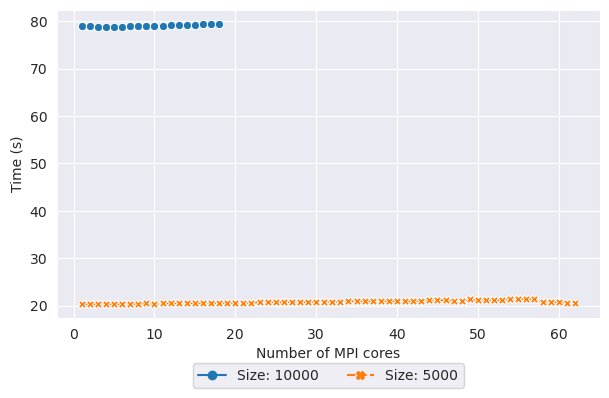

In [131]:
# Time plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='cores', 
    y='time', 
    data=MPI_ordered, 
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

# Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.ylabel('Time (s)')
plt.xlabel('Number of MPI cores')
plt.savefig('assets/MPI_ordered_time.png', dpi=250, bbox_inches='tight')
plt.show()

As expected, the execution time is constant, because the ordered evolution method doesn't exploit MPI, so the variation of the number of MPI processes doesn't affect the execution time (the code is run with the same conditions everytime).

At this point, analyzing the speedup and the efficiency doesn't make sense. Furthermore, it seems odd to analyze the MPI scalability on a code that doesn't exploit MPI.

### Static Evolution

In [132]:
# Load data
MPI_static_10000 = get_summary('strong_MPI_static_10000', test='mpi')
MPI_static_5000 = get_summary('strong_MPI_static_5000', test='mpi')

MPI_static = pd.concat([MPI_static_10000, MPI_static_5000])

MPI_static

,cores,size,time,speedup,efficiency,test
0,1,10000,78.205170,1.000000,1.000000,Size: 10000
1,2,10000,38.756903,2.017838,1.008919,Size: 10000
2,3,10000,25.924686,3.016629,1.005543,Size: 10000
3,4,10000,19.608834,3.988262,0.997066,Size: 10000
4,5,10000,15.874420,4.926490,0.985298,Size: 10000
...,...,...,...,...,...,...
123,124,5000,0.576845,34.989990,0.282177,Size: 5000
124,125,5000,0.573543,35.191458,0.281532,Size: 5000
125,126,5000,0.570554,35.375819,0.280760,Size: 5000
126,127,5000,0.573143,35.215982,0.277291,Size: 5000


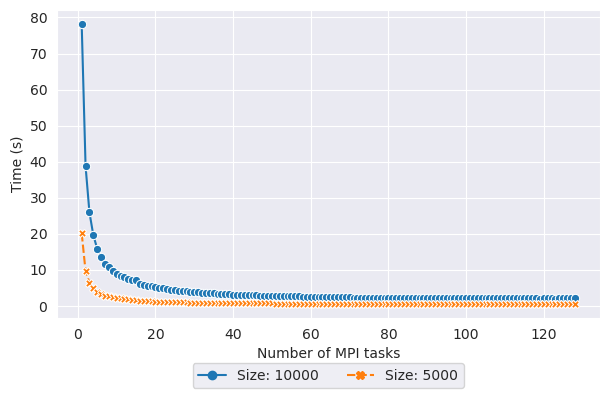

In [133]:
# Time plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='cores', 
    y='time', 
    data=MPI_static, 
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

# Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.ylabel('Time (s)')
plt.xlabel('Number of MPI tasks')
plt.savefig('assets/MPI_static_time.png', dpi=250, bbox_inches='tight')
plt.show()

As expected, the plot shows that the execution time decreases as the number of MPI processes increases. The execution time quickly approaches an almost constant value, meaning that after a certain number of MPI processes (in particular 30-40), the benefits of parallelization are not significant.

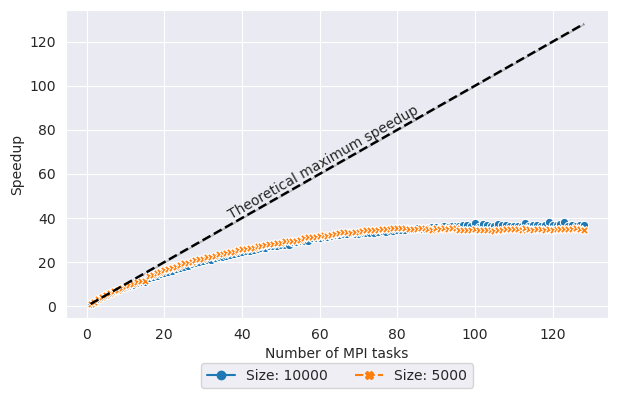

In [134]:
# Speedup plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='cores', 
    y='speedup', 
    data=MPI_static,
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

## Theoretical maximum speedup:
sns.lineplot(
    x='cores', 
    y='cores', 
    data=MPI_static, 
    color='black',
    linestyle='--',
    linewidth=1.75
)
plt.text(x=61, y=65,
            s='Theoretical maximum speedup', 
            va='center', 
            ha='center', 
            rotation=45, 
            rotation_mode='anchor', 
            transform_rotates_text=True)

## Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')

plt.ylabel('Speedup')
plt.xlabel('Number of MPI tasks')
plt.savefig('assets/MPI_static_speedup.png', dpi=250, bbox_inches='tight')
plt.show()

The speedup is sublinear, this is probably due to the communication and synchronization overhead introduced at higher core counts. Furthermore, Amdahl’s Law states that the speedup of a program is limited by the proportion of the code that cannot be parallelized. This time the speedup is not better with an increased problem size, further tests with even greater sizes would be needed to verify the Gustafson’s Law, but this is not possible in the 2h maximum time limit imposed by the cluster.

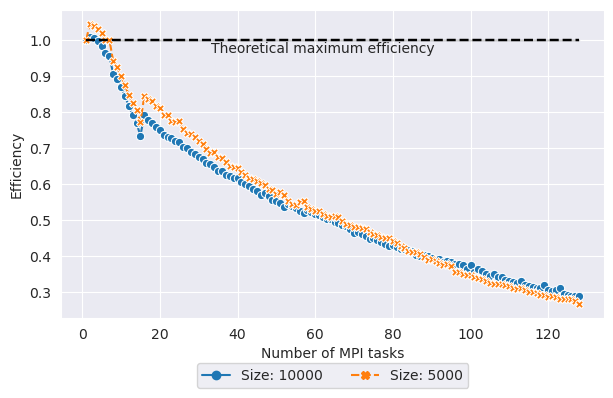

In [135]:
# Efficiency plot
plt.figure(figsize=(7, 4))

sns.set_style('darkgrid')

sns.lineplot(
    x='cores', 
    y='efficiency', 
    data=MPI_static, 
    hue='test',
    markers=True, 
    markersize=6, 
    style='test',
)

## Theoretical maximum efficiency
sns.lineplot(
    x='cores', 
    y=1, 
    data=MPI_static,
    color='black',
    linestyle='--',
    linewidth=1.75
)
plt.text(x=62, y=0.975, s='Theoretical maximum efficiency', va='center', ha='center')

## Legend relocation
plt.legend(bbox_to_anchor=(0.5, -0.25), loc='lower center', ncol=2, title='')
plt.ylabel('Efficiency')
plt.xlabel('Number of MPI tasks')
plt.savefig('assets/MPI_static_efficiency.png', dpi=250, bbox_inches='tight')
plt.show()

Same considerations as before apply to the efficiency.